In [1]:
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("spotify.sqlite3")
c = conn.cursor()

In [3]:
#ეს კოდი დაბეჭდავს იმ ტრეკების სახელებს, რომლებიც ეკუთვნის ემინემს და პოპულარულობის მაჩვენებელი 70-ზე მეტია

In [4]:
artist = 'Eminem'
streams = 70
c.execute("SELECT * FROM songs WHERE Artist=? and Spotify_Popularity>?",(artist, streams))
for each in c.fetchall():
    print(each[1])

Houdini
Music To Be Murdered By
538 Hitzone 55
Not Afraid
8 Mile
The Eminem Show
The Source Hip-Hop Hits Vol. 4
The Source - Hip Hop Hits Vol. 6
Encore (Deluxe)


In [5]:
#ეს კოდი მომხმარებლის შეყვანილი ინფორმაციის მიხედვით, ბაზაში, ბოლოში დაამატებს სტრიქონს

In [6]:
singer = input('შეიყვანეთ მომღერლის სახელი:')
popularity = int(input('შეიყვანეთ მისი პოპულარობის ზომა 1-100 შუალედში:'))
album = input('შეიყვანეთ ალბომის სახელი:')
date = input('შეიყვანეთ გამოშვების თარიღი:')
music = input('შეიყვანეთ სიმღერის სახელი:')

c.execute('''INSERT INTO songs (Artist, Spotify_Popularity,
Album_Name, Release_Date, Track) VALUES (?,?,?,?,?)''', (singer, popularity, album, date, music))
conn.commit()

შეიყვანეთ მომღერლის სახელი: Max.95
შეიყვანეთ მისი პოპულარობის ზომა 1-100 შუალედში: 50
შეიყვანეთ ალბომის სახელი: Sevda Universal
შეიყვანეთ გამოშვების თარიღი: 3/25/2025
შეიყვანეთ სიმღერის სახელი: Ukun


In [7]:
#ეს კოდი მომხმარებელს საშუალებას აძლევს, რომ აირჩიოს ალბომის სახელი და გამოშვების თარიღი შეცვალოს ამ ალბომის ყველა სიმღერისთვის ბაზაში 

In [8]:
album_name = input('შეიყვანეთ ალბომის სახელი, რომლის გამოშვების თარიღის შეცვლაც გსურთ:')
album_date = input('შეიყვანეთ ახალი თარიღი:')

c.execute("UPDATE songs SET Release_Date=? WHERE Album_Name=?", (album_date, album_name))
conn.commit()

შეიყვანეთ ალბომის სახელი, რომლის გამოშვების თარიღის შეცვლაც გსურთ: Houdini
შეიყვანეთ ახალი თარიღი: 1/10/2025


In [9]:
#ეს კოდი მომხმარებელს საშუალებას აძლევს აირჩიოს არტისტი და წაშალოს მისი ყველა სიმღერა

In [10]:
delete_artist = input('შეიყვანეთ არტისტი, რომლის სიმღერების ამოშლაც გსურთ ბაზიდან:')
c.execute("DELETE FROM songs WHERE Artist=?", (delete_artist,))
conn.commit()

შეიყვანეთ არტისტი, რომლის სიმღერების ამოშლაც გსურთ ბაზიდან: Max.95


In [12]:
#ამ კოდში შექმნილია ფუნქცია, რომელიც ითვლის ბაზაში არტისტის ტრეკის რაოდენობას, აღებულია რვა არტისტი

In [13]:
def count_songs(musician):
    return c.execute("SELECT count (*) FROM songs WHERE Artist=?", (musician,)).fetchone()[0]
E=count_songs("Eminem")
K=count_songs("Kendrick Lamar")
T=count_songs("Travis Scott")
D=count_songs("Drake")
TW=count_songs("21 Savage")
TY=count_songs("Tyler, The Creator")
L=count_songs("Lil Uzi Vert")
X=count_songs("XXXTENTACION")
labels = ('Eminem', 'Kendrick Lamar', 'Travis Scott', 'Drake', '21 Savage',
          'Tyler, The Creator', 'Lil Uzi Vert', 'XXXTENTACION')
sizes = [E,K,T,D,TW,TY,L,X]

In [14]:
#წრიული დიაგრამა, რომელზეც გამოსახულია პროცენტულად არტისტების ტრეკების რაოდენობა ბაზაში

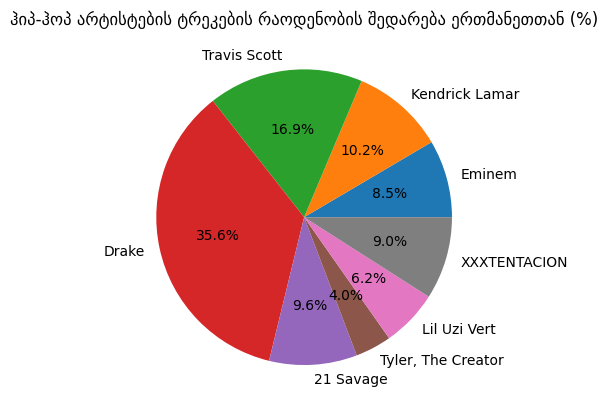

In [15]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('ჰიპ-ჰოპ არტისტების ტრეკების რაოდენობის შედარება ერთმანეთთან (%)')
plt.show()

In [16]:
#სვეტოვანი დიაგრამა, სადაც რიცხობრივად არის გამოსახული არტისტების ტრეკების რაოდენობა, თითოეული სვეტი სხვადასხვა ფერია

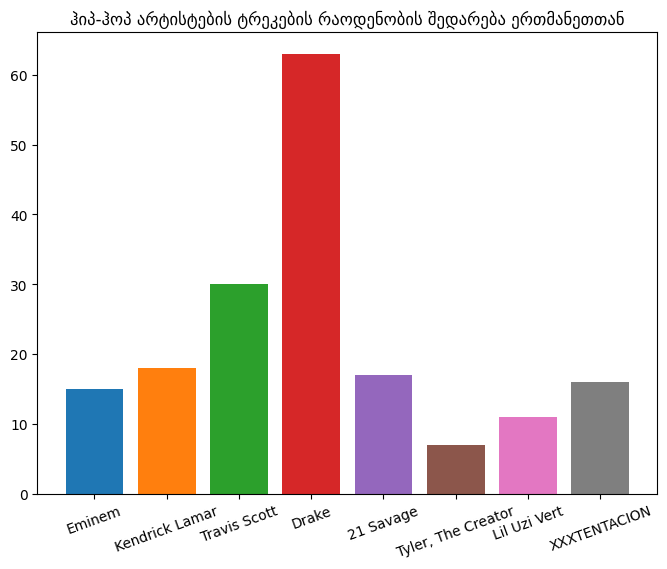

In [17]:
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colours)
plt.xticks(rotation=20)
plt.title('ჰიპ-ჰოპ არტისტების ტრეკების რაოდენობის შედარება ერთმანეთთან')
plt.show()

In [18]:
#scatter ით გამოსახულია თუ რა კავშირია ბაზაში ორ სვეტს შორის. ესენია Track_Scores და Spotify_Popularity 

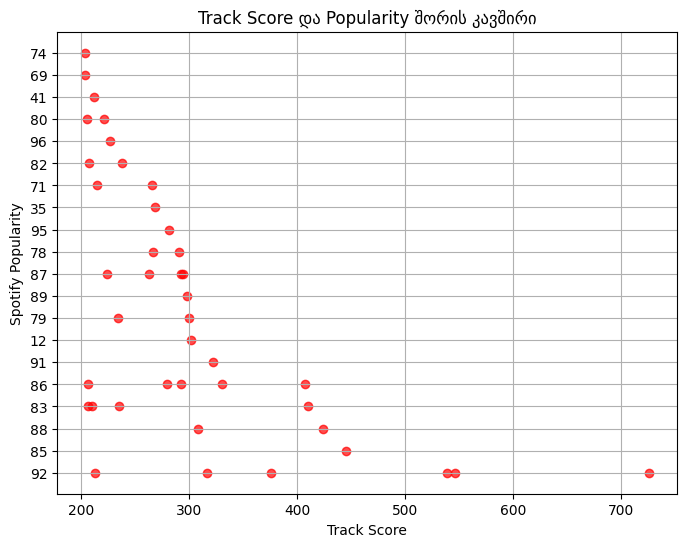

In [19]:
scores = []
popularity = []
c.execute("SELECT * FROM songs")
for each in c.fetchmany(50):
    if each[6] is not None and each[10] is not None:
        scores.append((each[6]))
        popularity.append(each[10])

plt.figure(figsize=(8, 6))
plt.scatter(scores, popularity, color='red', alpha=0.7)
plt.xlabel('Track Score')
plt.ylabel('Spotify Popularity')
plt.title('Track Score და Popularity შორის კავშირი')
plt.grid(True)
plt.show()